In [1]:

from urllib.request import urlopen
from IPython.display import SVG
import matplotlib.pyplot as plt
from rdkit import Chem
import pickle
from tqdm import tqdm

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import visualizer as visualizer
import utils as utils
import fragmentation_py as fragmentation_py
import library_downloader as library_downloader
import SiteLocator as modSite

In [4]:
# library = "GNPS-LIBRARY"
library = "GNPS-MSMLS"
# library = "GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE"

# if directory does not exist, create it
if not os.path.exists( os.path.join("../data/libraries",library)):
    url = "https://gnps-external.ucsd.edu/gnpslibrary/" + library + ".json"
    location = "../data/libraries/" + library + "/"
    library_downloader.download(url, location, 0.5, 0.1)

# load data_dict_filtered
with open(os.path.join("../data/libraries",library,"data_dict_filtered.pkl"), "rb") as f:
    data_dict_filtered = pickle.load(f)

# load matches
with open(os.path.join("../data/libraries",library,"matches.pkl"), "rb") as f:
    matches = pickle.load(f)

# load cachedStructures_filtered
with open(os.path.join("../data/libraries",library,"cachedStructures.pkl"), "rb") as f:
    cachedStructures_filtered = pickle.load(f)


In [9]:
x = matches[3].pop()
print(data_dict_filtered[x[0]]["Smiles"])
print(data_dict_filtered[x[1]]["Smiles"])

C1=C(C=C(C=C1N)O)C(=O)O
OCC1=CC=CC=C1


NameError: name 'x' is not defined

find line

In [73]:
count = 0
ids = []
for match in tqdm(matches[1]):
    if len(ids) > 10:
        break
    for match2 in matches[1]:
        if match[1] == match2[0]:
            try:
                mol = Chem.MolFromSmiles(data_dict_filtered[match[1]]["Smiles"])
                substruct = Chem.MolFromSmiles(data_dict_filtered[match2[1]]["Smiles"])
                site = modSite.SiteLocator(utils.generate_usi(match2[1], library), utils.generate_usi(match[1], library), substruct)
                if len(site.shifted) < 5:
                    continue
                modificattionSite = list(utils.calculateModificationSites(mol, substruct, False))[0]
                if site.accuracy_score(modificattionSite) < 0.8:
                    continue
                
                
                mol = Chem.MolFromSmiles(data_dict_filtered[match[0]]["Smiles"])
                substruct = Chem.MolFromSmiles(data_dict_filtered[match[1]]["Smiles"])
                site = modSite.SiteLocator(utils.generate_usi(match[1], library), utils.generate_usi(match[0], library), substruct)
                if len(site.shifted) < 5:
                    continue
                modificattionSite = list(utils.calculateModificationSites(mol, substruct, False))[0]
                if site.accuracy_score(modificattionSite) > 0.65:
                    continue
                
                ids.append([match2[1], match[1], match[0]])
                count += 1
                break
            except:
                pass

print (count)

100%|██████████| 544/544 [04:37<00:00,  1.96it/s]

10


In [80]:
print (len(ids))
i = 6
print(ids[i])
print (utils.generate_usi(ids[i][0], library))
print (data_dict_filtered[ids[i][0]]["Smiles"])
print (utils.generate_usi(ids[i][1], library))
print (data_dict_filtered[ids[i][1]]["Smiles"])
print (utils.generate_usi(ids[i][2], library))
print (data_dict_filtered[ids[i][2]]["Smiles"])

10
['CCMSLIB00005463927', 'CCMSLIB00005463968', 'CCMSLIB00005464192']
mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463927
NCCCCC(O)=O
mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463968
NCCC[C@H](N)C(O)=O
mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005464192
N[C@@H](CCCN=C(N)N)C(O)=O


In [16]:
site = modSite.SiteLocator("mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005464222", "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463642", "C[C@@H]1OC(O)[C@H](O)[C@H](O)[C@H]1O")
site.distances

array([[0., 1., 2., 3., 4., 4., 5., 3., 4., 2., 3.],
       [1., 0., 1., 2., 3., 3., 4., 2., 3., 1., 2.],
       [2., 1., 0., 1., 2., 2., 3., 3., 4., 2., 3.],
       [3., 2., 1., 0., 1., 1., 2., 2., 3., 3., 4.],
       [4., 3., 2., 1., 0., 2., 3., 3., 4., 4., 5.],
       [4., 3., 2., 1., 2., 0., 1., 1., 2., 2., 3.],
       [5., 4., 3., 2., 3., 1., 0., 2., 3., 3., 4.],
       [3., 2., 3., 2., 3., 1., 2., 0., 1., 1., 2.],
       [4., 3., 4., 3., 4., 2., 3., 1., 0., 2., 3.],
       [2., 1., 2., 3., 4., 2., 3., 1., 2., 0., 1.],
       [3., 2., 3., 4., 5., 3., 4., 2., 3., 1., 0.]])

In [17]:
mol1 = Chem.MolFromSmiles("C[C@@H]1OC(O)[C@H](O)[C@H](O)[C@H]1O")
modifLoc = list(utils.calculateModificationSites(Chem.MolFromSmiles("OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O"), mol1, False))

In [18]:
modifLoc

[0]

In [21]:
accuracy_score = site.accuracy_score(modifLoc[0], peak_presence_only=False, combine=False, return_all=False)
accuracy_score

0.6

In [23]:
site.accuracy_score(modifLoc[0]) < 0.8

True

In [60]:
match = ["CCMSLIB00005464431","CCMSLIB00005463642"]
match2 = ["CCMSLIB00005463642", "CCMSLIB00005464222"]
mol = Chem.MolFromSmiles(data_dict_filtered[match[1]]["Smiles"])
substruct = Chem.MolFromSmiles(data_dict_filtered[match2[1]]["Smiles"])
site = modSite.SiteLocator(utils.generate_usi(match2[1], library), utils.generate_usi(match[1], library), substruct)
if len(site.shifted) < 3:
    print("continue")
modificattionSite = list(utils.calculateModificationSites(mol, substruct))[0]
if site.accuracy_score(modificattionSite) < 0.8:
    print("continue")
else:
    print(modificattionSite)
    print (site.accuracy_score(modificattionSite))
    print (match2[1], match[1], match[0])

1
0.8
CCMSLIB00005464222 CCMSLIB00005463642 CCMSLIB00005464431


In [53]:
usi1 = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005464222"
usi2 = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463642"
smiles2 = "OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@H]1O"
mol1 = Chem.MolFromSmiles("C[C@@H]1OC(O)[C@H](O)[C@H](O)[C@H]1O")
siteLocator = modSite.SiteLocator(usi1, usi2, mol1)
modifLoc = list(utils.calculateModificationSites(Chem.MolFromSmiles(smiles2), mol1, False))
accuracy_score = siteLocator.accuracy_score(modifLoc[0], peak_presence_only=False, combine=False, return_all=True)
accuracy_score

{'score': 0.6, 'count': 1, 'isMax': 0, 'closestMaxAtomDistance': 0.0}

[0]


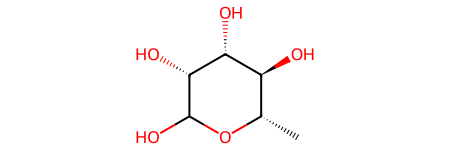

In [59]:
mol1 = Chem.MolFromSmiles("C[C@@H]1OC(O)[C@H](O)[C@H](O)[C@H]1O")
print(modifLoc)
mol1

In [63]:
list(utils.calculateModificationSites(mol, substruct, False))[0]

0

In [64]:
modifLoc = list(utils.calculateModificationSites(Chem.MolFromSmiles(smiles2), mol1, False))

In [81]:
count = 0
ids2 = []
for match in tqdm(matches[1]):
    if len(ids2) > 10:
        break
    for match2 in matches[1]:
        if match[1] == match2[1] and match[0] != match2[0]:
            try:
                mol = Chem.MolFromSmiles(data_dict_filtered[match[0]]["Smiles"])
                substruct = Chem.MolFromSmiles(data_dict_filtered[match[1]]["Smiles"])
                site = modSite.SiteLocator(utils.generate_usi(match[1], library), utils.generate_usi(match[0], library), substruct)
                if len(site.shifted) < 5:
                    continue
                modificattionSite = list(utils.calculateModificationSites(mol, substruct, False))[0]
                if site.accuracy_score(modificattionSite) < 0.8:
                    continue
                
                
                mol = Chem.MolFromSmiles(data_dict_filtered[match2[0]]["Smiles"])
                substruct = Chem.MolFromSmiles(data_dict_filtered[match2[1]]["Smiles"])
                site = modSite.SiteLocator(utils.generate_usi(match2[1], library), utils.generate_usi(match2[0], library), substruct)
                if len(site.shifted) < 5:
                    continue
                modificattionSite = list(utils.calculateModificationSites(mol, substruct, False))[0]
                if site.accuracy_score(modificattionSite) > 0.65:
                    continue
                
                ids2.append([match2[1], match[1], match[0]])
                count += 1
                break
            except:
                pass

print (count)

  5%|▍         | 27/544 [00:22<05:21,  1.61it/s]

In [ ]:
print (len(ids2))
i = 0
print(ids2[i])
print (utils.generate_usi(ids2[i][0], library))
print (data_dict_filtered[ids2[i][0]]["Smiles"])
print (utils.generate_usi(ids2[i][1], library))
print (data_dict_filtered[ids2[i][1]]["Smiles"])
print (utils.generate_usi(ids2[i][2], library))
print (data_dict_filtered[ids2[i][2]]["Smiles"])